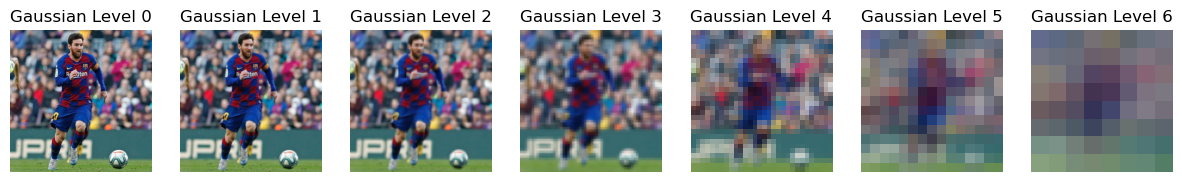

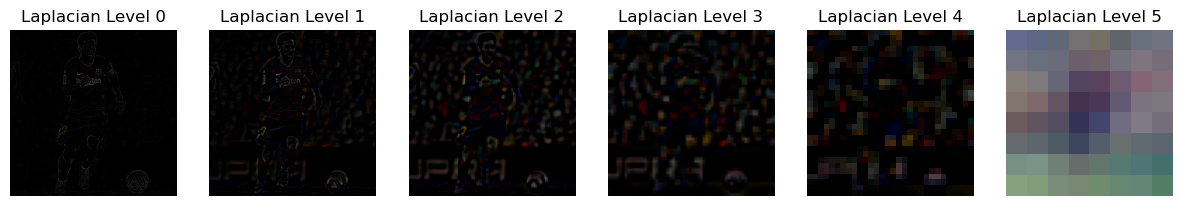

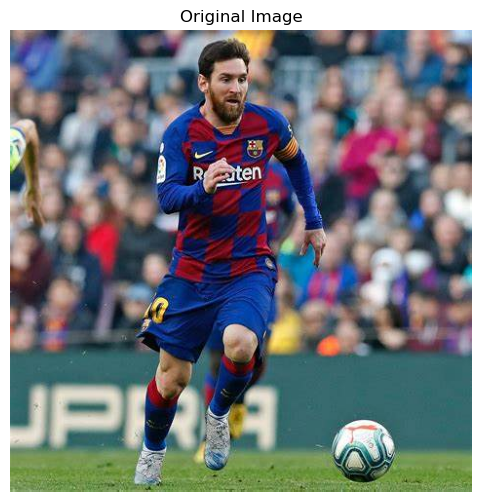

: 

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load and convert the image
img = cv2.imread('images/messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
layer = img.copy()

# Create the Gaussian Pyramid
gaussian_pyramid_list = [layer]
for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)

# Plot the Gaussian Pyramid
plt.figure(figsize=(15, 8))
for i in range(len(gaussian_pyramid_list)):
    plt.subplot(1, len(gaussian_pyramid_list), i + 1)
    plt.imshow(gaussian_pyramid_list[i])
    plt.title(f'Gaussian Level {i}')
    plt.axis('off')
plt.show()

# Create the Laplacian Pyramid
layer = gaussian_pyramid_list[-1]
laplacian_pyramid_list = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid_list[i])

    # Resize the expanded image to match the size of the current level
    if gaussian_extended.shape[:2] != gaussian_pyramid_list[i - 1].shape[:2]:
        gaussian_extended = cv2.resize(gaussian_extended, (gaussian_pyramid_list[i - 1].shape[1], gaussian_pyramid_list[i - 1].shape[0]))

    laplacian = cv2.subtract(gaussian_pyramid_list[i - 1], gaussian_extended)
    laplacian_pyramid_list.append(laplacian)

# Plot the Laplacian Pyramid
plt.figure(figsize=(15, 8))
laplacian_pyramid_list = laplacian_pyramid_list[::-1]  # Reverse the list to start from the top level
for i in range(len(laplacian_pyramid_list)):
    plt.subplot(1, len(laplacian_pyramid_list), i + 1)
    plt.imshow(cv2.convertScaleAbs(laplacian_pyramid_list[i]))
    plt.title(f'Laplacian Level {i}')
    plt.axis('off')
plt.show()

# Plot the original image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()